In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from utils.ScikitBasedNMF import UserDefinedNMF

In [3]:
def load_data(file_path):
    df = pd.read_csv(file_path, usecols=['userId', 'movieId', 'rating'])
    return df

In [4]:
traindf = load_data('./datasets/training_data.csv')

In [5]:
user_ids = traindf['userId'].astype("category").cat.codes
item_ids = traindf['movieId'].astype("category").cat.codes

In [6]:
rating_matrix = np.zeros((user_ids.max()+1, item_ids.max()+1))
rating_matrix[user_ids, item_ids] = traindf['rating']

In [7]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range = (0.5, 5))

rating_matrix_scaled = scaler.fit_transform(rating_matrix)

In [8]:
model = UserDefinedNMF(n_components=15, max_iter=200)
model.fit(rating_matrix_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [9]:
W = model.transform(rating_matrix_scaled)
H = model.model.components_

In [10]:
user_id = 1
predicted_ratings = np.dot(W[user_id, :], H)
recommended_item_ids = np.argsort(predicted_ratings)[::-1][:5]

print(f"User: {user_id} Recommended item ids: {recommended_item_ids}")

User: 1 Recommended item ids: [ 192 2905 1374  180 1223]


In [11]:
predicted_ratings_train = np.dot(W, H)
actual_ratings_train = rating_matrix_scaled

In [12]:
rmse_train = np.sqrt(mean_squared_error(actual_ratings_train[actual_ratings_train > 0], predicted_ratings_train[actual_ratings_train > 0]))
print(f"RMSE: {rmse_train}")

RMSE: 0.5139977931040381


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


threshold = 0.5

# Binarize actual and predicted ratings based on the threshold
actual_binary = (actual_ratings_train > threshold).astype(int)
predicted_binary = (predicted_ratings_train > threshold).astype(int)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(actual_binary[actual_ratings_train > 0], predicted_binary[actual_ratings_train > 0])
precision = precision_score(actual_binary[actual_ratings_train > 0], predicted_binary[actual_ratings_train > 0])
recall = recall_score(actual_binary[actual_ratings_train > 0], predicted_binary[actual_ratings_train > 0])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.4104129915175488
Precision: 0.05592623523108412
Recall: 0.9911535639708787


In [14]:
actual_ratings_train

array([[4.1 , 0.5 , 4.1 , ..., 0.5 , 0.5 , 0.5 ],
       [0.5 , 0.5 , 0.5 , ..., 0.5 , 0.5 , 0.5 ],
       [0.5 , 0.5 , 0.5 , ..., 0.5 , 0.5 , 0.5 ],
       ...,
       [2.75, 2.3 , 2.3 , ..., 0.5 , 0.5 , 0.5 ],
       [0.5 , 0.5 , 0.5 , ..., 0.5 , 0.5 , 0.5 ],
       [5.  , 0.5 , 0.5 , ..., 0.5 , 0.5 , 0.5 ]])

In [15]:
predicted_ratings_train

array([[2.86450973, 1.30366317, 1.30484919, ..., 0.5054096 , 0.352488  ,
        0.48346235],
       [0.67699161, 0.50312116, 0.57270539, ..., 0.48081724, 0.53514047,
        0.49579624],
       [0.69176624, 0.4653362 , 0.57216079, ..., 0.49057095, 0.47641877,
        0.49017377],
       ...,
       [2.46854549, 1.32547145, 1.16712286, ..., 0.49617806, 0.413482  ,
        0.53783049],
       [1.18904566, 0.99439709, 0.77362468, ..., 0.4745955 , 0.50016945,
        0.48427824],
       [1.81377472, 2.26225796, 0.31250698, ..., 0.39826528, 2.08448743,
        0.35674007]])

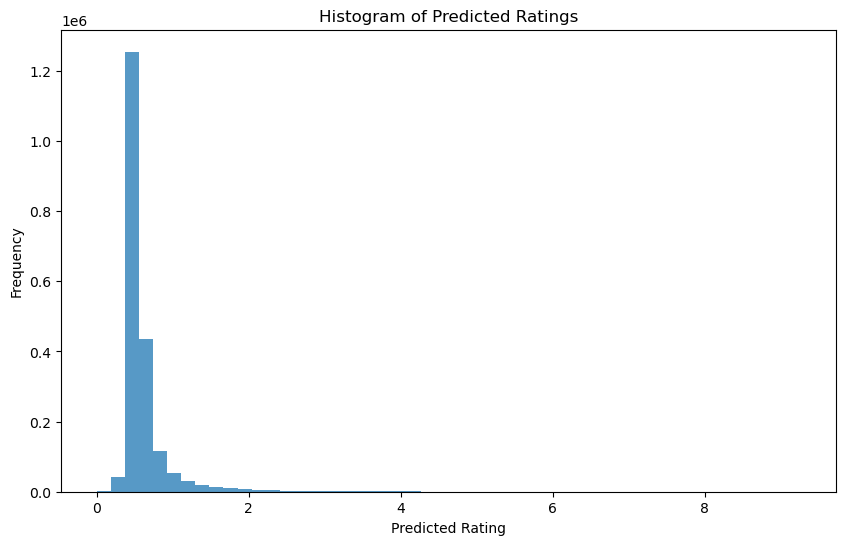

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(predicted_ratings_train[actual_ratings_train > 0], bins=50, alpha=0.75)
plt.title('Histogram of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.show()